In [1]:
import os
import numpy as np
import SimpleITK
import matplotlib.pyplot as plt
import zipfile

In [2]:
def check_file(filename, str):
    if filename[-1]=='/':
        return 0
    if str not in filename:
        return 0
    if 'mha' not in filename:
        return 0
    return 1

In [58]:
def sitk_show(img, title=None, margin=0.05, dpi=40 ):
    nda = SimpleITK.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()

In [3]:
#prikaze eno 3d sliko
def display_numpy(picture):
    fig = plt.figure()
    for num,slice in enumerate(picture):
        if num>=30:
            break
        y = fig.add_subplot(5,6,num+1)
        y.imshow(slice, cmap='gray')
    plt.show()
    return

In [25]:
zf = zipfile.ZipFile('BRATS2015_Training.zip', 'r')
count = 0
train_data = []
for f in zf.namelist():
    if (check_file(f,'T2') is 1):
        path = zf.extract(f)
        img = SimpleITK.ReadImage(path)
        nd_img = SimpleITK.GetArrayFromImage(img)
        train_data.append(nd_img[11:139,43:203,46:190])
        os.remove(path)

In [19]:
train_seg = []
for f in zf.namelist():
    if (check_file(f,'OT') is 1):
        path = zf.extract(f)
        img = SimpleITK.ReadImage(path)
        nd_img = SimpleITK.GetArrayFromImage(img)
        train_seg.append(nd_img[11:139,43:203,46:190])
        os.remove(path)

In [20]:
train_data = np.array(train_data)
print(train_data.shape)
print(np.max(train_data))

(274L, 128L, 160L, 144L)
15281


In [22]:
#train_data = np.array(train_data)
train_seg = np.array(train_seg)

train_seg1 = train_seg
train_seg2 = train_seg
train_seg3 = train_seg
train_seg4 = train_seg

for i,i1 in enumerate(train_seg):
    for j,j1 in enumerate(i1):
        for k,k1 in enumerate(j1):
            for l,l1 in enumerate(k1):
                if l is 1:
                    train_seg1[i][j][k][l] = 1
                elif l is 2:
                    train_seg2[i][j][k][l] = 1
                elif l is 3:
                    train_seg3[i][j][k][l] = 1
                elif l is 4:
                    train_seg4[i][j][k][l] = 1
                else:
                    train_seg1[i][j][k][l] = 0
                    train_seg2[i][j][k][l] = 0
                    train_seg3[i][j][k][l] = 0
                    train_seg4[i][j][k][l] = 0

C:\Users\Aneja\Anaconda3\envs\dl27\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in divide


In [28]:
train_data = np.array(train_data)
print(train_data.shape)
print(np.min(train_data))
print(np.max(train_data))

print(train_seg1.shape)
print(np.min(train_seg1))
print(np.max(train_seg1))

print(train_seg2.shape)
print(np.min(train_seg2))
print(np.max(train_seg2))
print(train_seg3.shape)
print(np.min(train_seg3))
print(np.max(train_seg3))
print(train_seg4.shape)
print(np.min(train_seg4))
print(np.max(train_seg4))

(274L, 128L, 160L, 144L)
0
15281
(274L, 128L, 160L, 144L)
0
1
(274L, 128L, 160L, 144L)
0
1
(274L, 128L, 160L, 144L)
0
1
(274L, 128L, 160L, 144L)
0
1


In [30]:
np.save('train-{}-{}-{}.npy'.format(128,160,144), train_data)
np.save('seg1-{}-{}-{}.npy'.format(128,160,144), train_seg1)
np.save('seg2-{}-{}-{}.npy'.format(128,160,144), train_seg2)
np.save('seg3-{}-{}-{}.npy'.format(128,160,144), train_seg3)
np.save('seg4-{}-{}-{}.npy'.format(128,160,144), train_seg4)

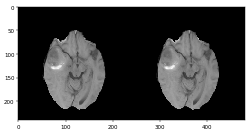

In [63]:
# Paths to the .mhd files
filenameT1 = "VSD.Brain.XX.O.MR_T1.54513.mha"
filenameT2 = "VSD.Brain_3more.XX.O.OT.54517.mha"

# Slice index to visualize with 'sitk_show'
idxSlice = 60

# int label to assign to the segmented gray matter
labelGrayMatter = 1

imgT1Original = SimpleITK.ReadImage(filenameT1)
imgT2Original = SimpleITK.ReadImage(filenameT2)

sitk_show(SimpleITK.Tile(imgT1Original[:, :, idxSlice], imgT1Original[:, :, idxSlice], (2, 1, 0)))

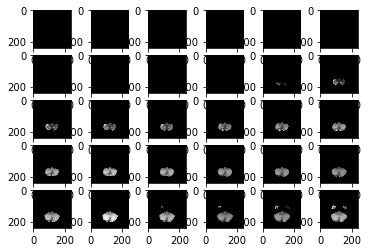

In [127]:
nda = SimpleITK.GetArrayFromImage(imgT1Original)
ndaseg = SimpleITK.GetArrayFromImage(imgT2Original)
display_numpy(nda)

In [35]:
nda.shape

(155L, 240L, 240L)

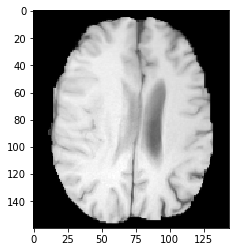

(155L, 160L, 144L)


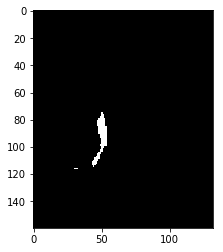

(155L, 160L, 132L)
[[0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0]]


In [199]:
plt.imshow(nda[100,43:203,46:190])
plt.show()
print(nda[:,43:203,46:190].shape)
plt.imshow(ndaseg[100,43:203,50:182])
plt.show()
print(ndaseg[:,43:203,50:182].shape)
ndaseg1 = ndaseg[:,43:203,50:182]
print(ndaseg1[100,80:100,40:60])

(128L, 240L, 240L)


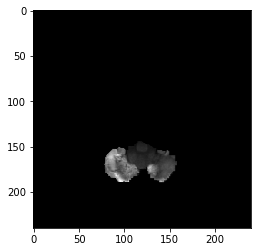

In [86]:
nda1 = nda[11:139][:][:]
print(nda1.shape)
plt.imshow(nda1[0])
plt.show()

NotImplementedError: Wrong number or type of arguments for overloaded function 'ReadImage'.
  Possible C/C++ prototypes are:
    itk::simple::ReadImage(std::vector< std::string,std::allocator< std::string > > const &,itk::simple::PixelIDValueEnum)
    itk::simple::ReadImage(std::string const &,itk::simple::PixelIDValueEnum)
